In [1]:
import pandas as pd
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [3]:
column=['mainroad','guestroom','basement','furnishingstatus','hotwaterheating','airconditioning','prefarea']

In [4]:
def encode_labels(df, columns):
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  for col in columns:
    data[col] = le.fit_transform(data[col])
  return data

In [5]:
encode_labels(data,column)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


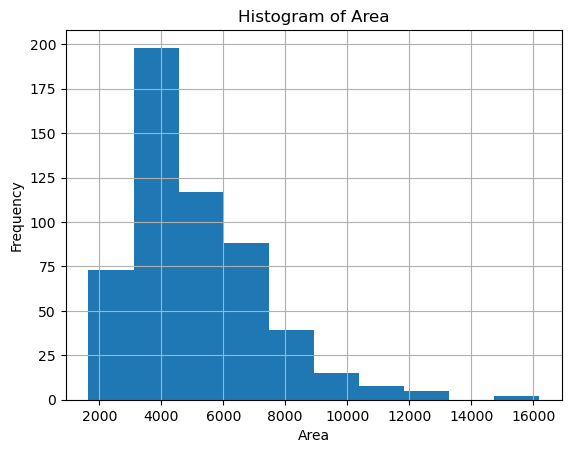

In [6]:
import matplotlib.pyplot as plt

data['area'].hist()
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram of Area')
plt.show()


In [7]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
X = data.drop('price', axis=1)
y = data['price']

In [9]:
from sklearn import linear_model, model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

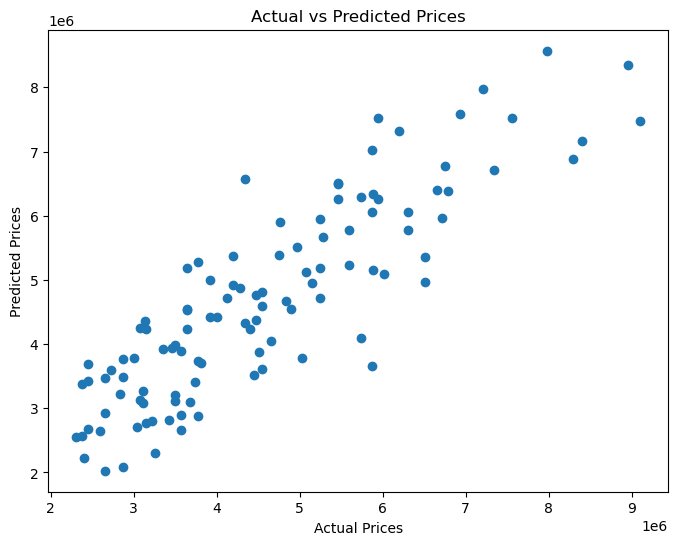

In [10]:
import matplotlib.pyplot as plt

#Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 657197708549.4606
R-squared: 0.7388189882890678


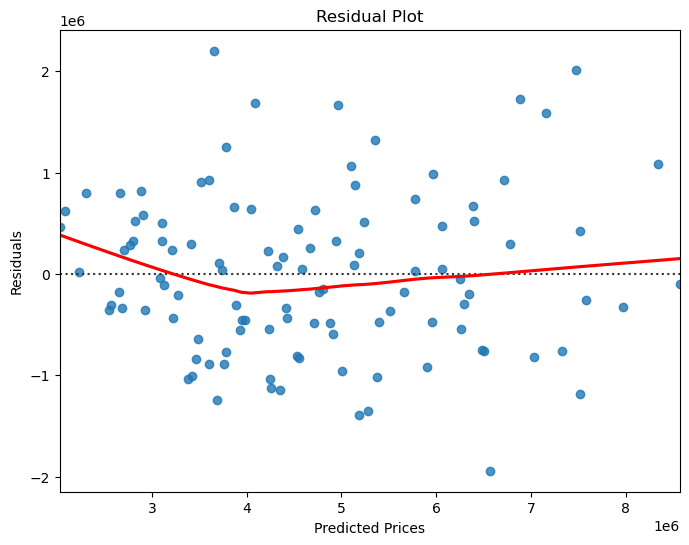

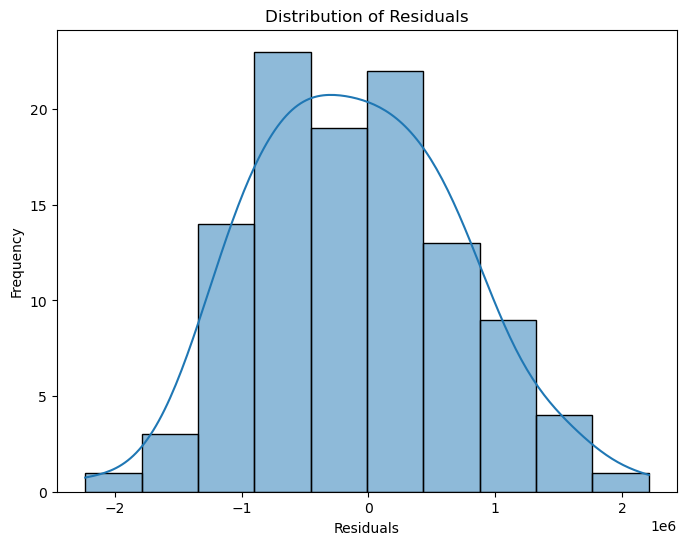

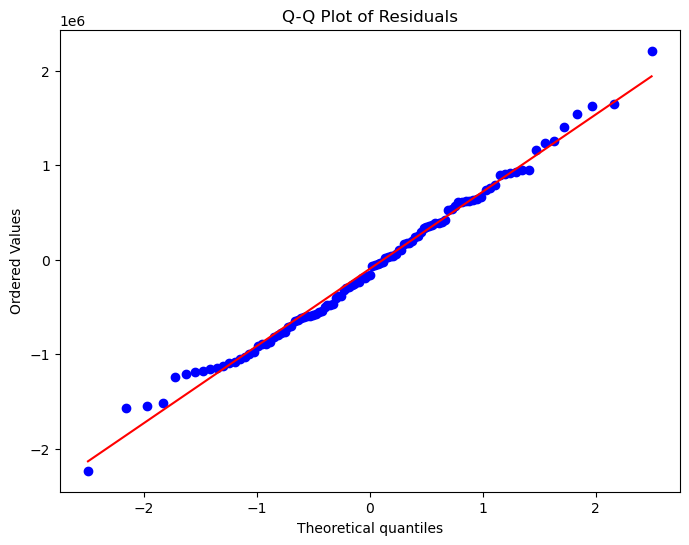

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

# Q-Q plot
from scipy import stats
import statsmodels.api as sm

plt.figure(figsize=(8, 6))
stats.probplot(y_test - y_pred, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()